In [6]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import matplotlib.cm as cmx
import matplotlib.colorbar as cb
import corner
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

%matplotlib inline

In [19]:
# format of files:
# sysIdx rPlanet[rEarth] b a/R*

sigmaRs = []
sigmabs = []
sigmaincs = []
medianRs = []
meanRs = []
mults = []

for i in range(0, 100):
    data = np.genfromtxt("./zipf/fake_keplerradii_{0}.dat".format(i))
    data = data[0:1965]
    incs = np.arccos(data[:,2]/data[:,3]) * (180./np.pi)
    for j in range(0,int(np.max(data[:,0]))):
        thisSysMask = [data[:,0] == j]
        sigmaRs.append(np.std(data[:,1][thisSysMask]))
        sigmabs.append(np.std(data[:,2][thisSysMask]))
        sigmaincs.append(np.std(incs[thisSysMask]))
        medianRs.append(np.median(data[:,1][thisSysMask]))
        meanRs.append(np.mean(data[:,1][thisSysMask]))
        mults.append(len(data[:,1][thisSysMask]))
        
sigmaRs = np.array(sigmaRs)
sigmabs = np.array(sigmabs)
sigmaincs = np.array(sigmaincs)
medianRs = np.array(medianRs)
meanRs = np.array(meanRs)
mults = np.array(mults)
print(np.shape(sigmaRs))
print(np.shape(medianRs))
print(np.shape(meanRs))
print(np.shape(mults))

nonans = (~np.isnan(sigmaRs) & ~np.isnan(sigmabs) & ~np.isnan(sigmaincs) & ~np.isnan(medianRs) & ~np.isnan(meanRs) & ~np.isnan(mults))

sigmaRs = sigmaRs[nonans]
sigmabs = sigmabs[nonans]
sigmaincs = sigmaincs[nonans]
medianRs = medianRs[nonans]
meanRs = meanRs[nonans]
mults = mults[nonans]

/Users/Emily/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:17: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/Emily/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/Emily/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will re

(153839,)
(153839,)
(153839,)
(153839,)


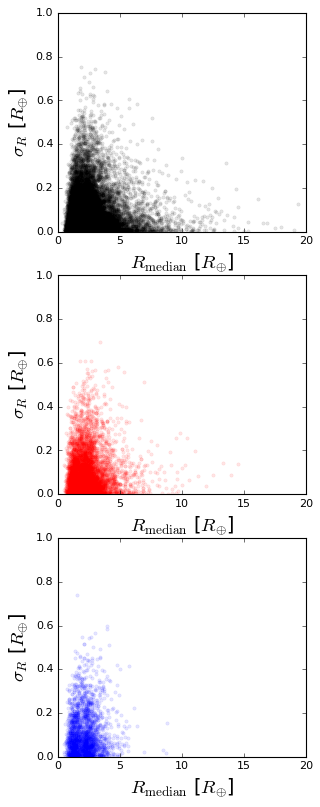

In [20]:
fig, axes = plt.subplots(3,1,figsize=(4,12))
axes[0].plot(medianRs[mults==2],sigmaRs[mults==2],'k.',alpha=0.1)
axes[1].plot(medianRs[mults==3],sigmaRs[mults==3],'r.',alpha=0.1)
axes[2].plot(medianRs[mults>3],sigmaRs[mults>3],'b.',alpha=0.1)

for ax in axes:
    ax.set_xlim(0,20)
    ax.set_ylim(0,1)
    ax.set_ylabel(r'$\sigma_R$ [$R_{\oplus}$]',fontsize=17)
    ax.set_xlabel(r'$R_{\mathrm{median}}$ [$R_{\oplus}$]',fontsize=17)
plt.show()

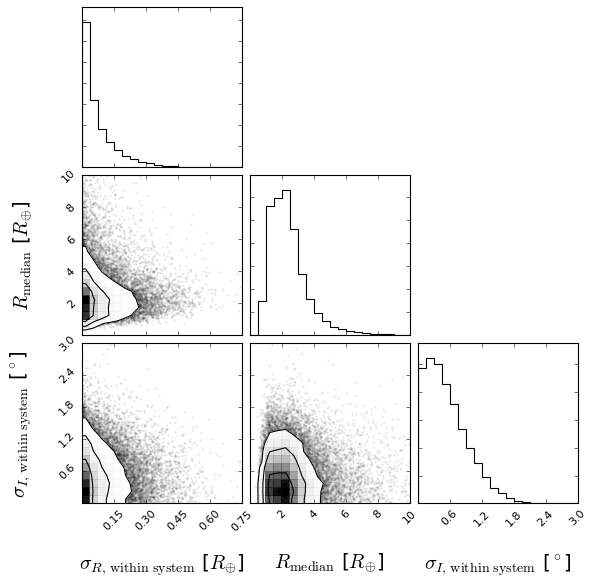

In [32]:
toCorner = np.vstack((sigmaRs[mults > 1].T, medianRs[mults > 1].T, sigmaincs[mults > 1].T)).T
labels = [r'$\sigma_{R,\,\mathrm{within\ system}}$ [$R_{\oplus}$]', r'$R_{\mathrm{median}}$ [$R_{\oplus}$]', r'$\sigma_{I,\,\mathrm{within\ system}}$ [$^\circ$]']

fig = plt.figure(figsize=(8,8))
corner.corner(toCorner,range=[(0.0,0.75),(0,10),(0,3.0)],labels=labels,label_kwargs={'fontsize':18})
#plt.show()
plt.savefig("zipf_sigmaR.png",fmt="png")

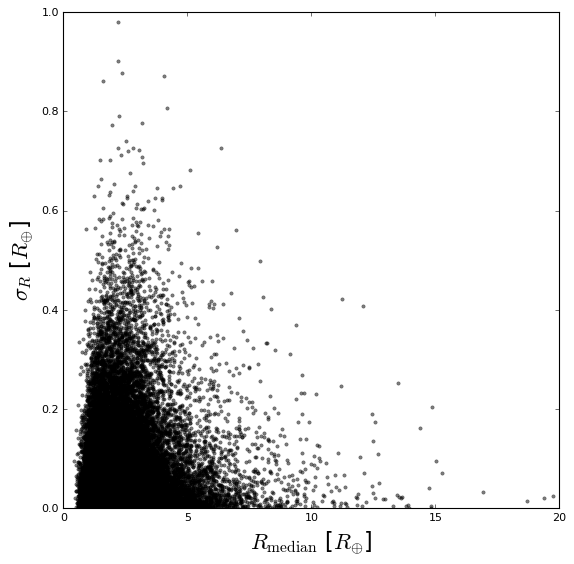

In [14]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.plot(medianRs[mults > 1],sigmaRs[mults > 1],'k.',alpha=0.5)

ax.set_xlim(0,20)
ax.set_ylim(0,1)
ax.set_ylabel(r'$\sigma_R$ [$R_{\oplus}$]',fontsize=20)
ax.set_xlabel(r'$R_{\mathrm{median}}$ [$R_{\oplus}$]',fontsize=20)
#plt.show()
plt.savefig("./zipf_sigmaR_vs_R.png",fmt="png")